In [1]:
import cv2
import math
import numpy as np
from numpy import random
import random as rng
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import urllib.request
%matplotlib inline

In [2]:
def get_sample_card(path = 'kaggle_dataset/Images/Images/'):
    card_num = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    card_suits = ['C', 'D', 'H', 'S']
    card_idx = range(0, 51)
    
    sample_card_path = random.choice(card_num) + random.choice(card_suits) + str(random.choice(card_idx)) + '.jpg'
    print('Card', sample_card_path)
    return cv2.cvtColor(cv2.imread(path + sample_card_path), cv2.COLOR_BGR2RGB)

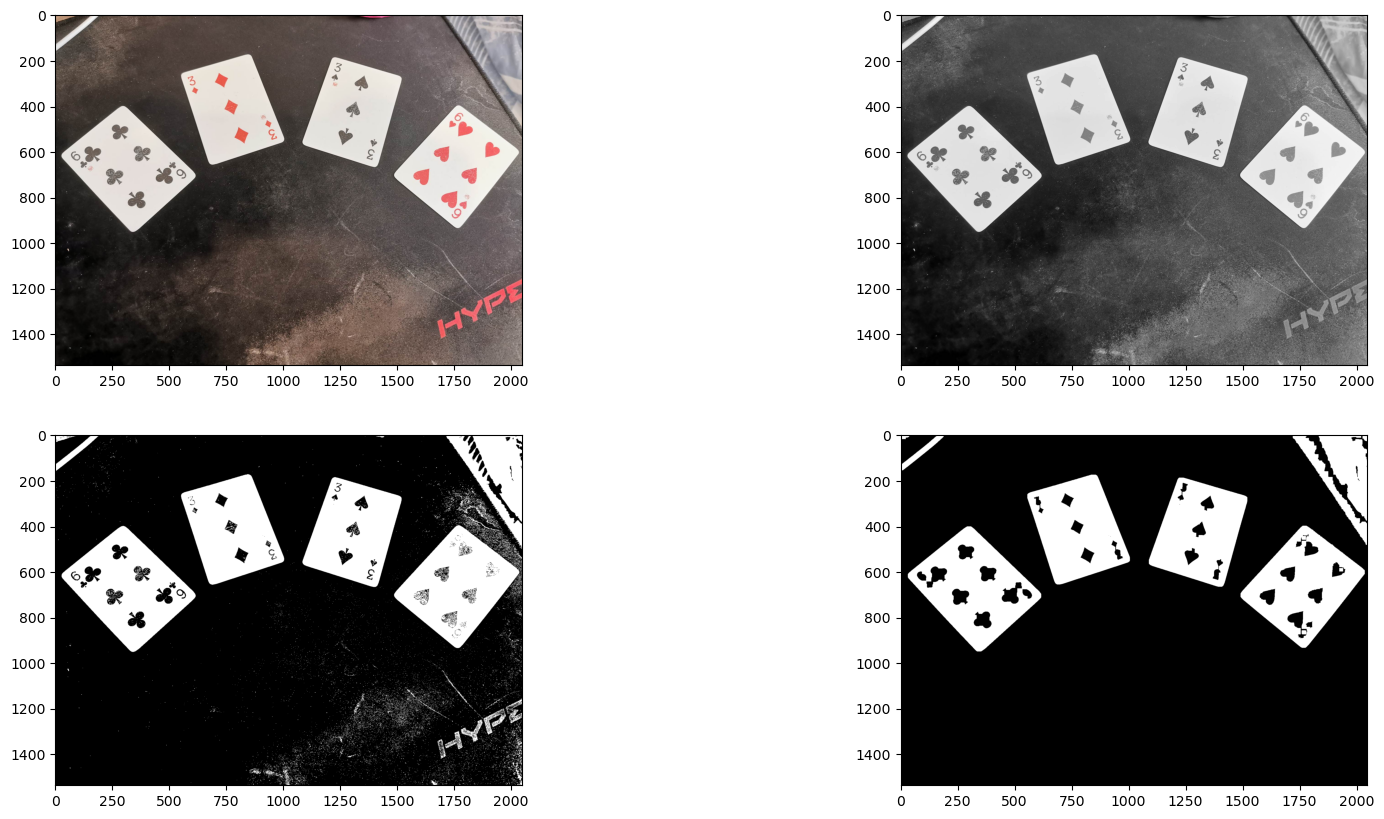

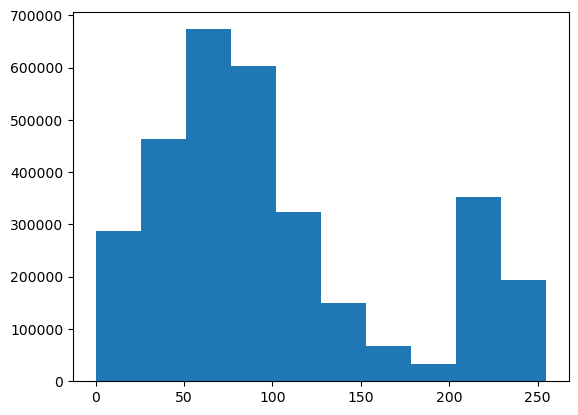

In [3]:
# inputImage = get_sample_card()
inputImage = cv2.cvtColor(cv2.imread("assets/cards01.jpg"), cv2.COLOR_BGR2RGB)
inputImageGray = cv2.cvtColor(inputImage, cv2.COLOR_RGB2GRAY)
# inputImageGray = cv2.medianBlur(inputImageGray, 13)
_,thresholdImage = cv2.threshold(inputImageGray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
morphImage = cv2.morphologyEx(thresholdImage, cv2.MORPH_OPEN, np.ones((15, 15), np.uint8))

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.imshow(inputImage)

plt.subplot(2, 2, 2)
plt.imshow(inputImageGray, cmap='gray')

plt.subplot(2, 2, 3)
plt.imshow(thresholdImage, cmap='gray')

plt.subplot(2, 2, 4)
plt.imshow(morphImage, cmap='gray')

plt.show()

plt.hist(inputImageGray.flatten())
plt.show()



contour points: [291, 525, 829, 908, 16, 292, 544, 143, 14]
contour area:   [170159.0, 156320.5, 137061.0, 139946.5, 510.0, 44835.0, 21203.5, 5307.0, 483.0]
contour points: [291, 525, 829, 908]
contour area:   [170159.0, 156320.5, 137061.0, 139946.5]
Total Card: 4


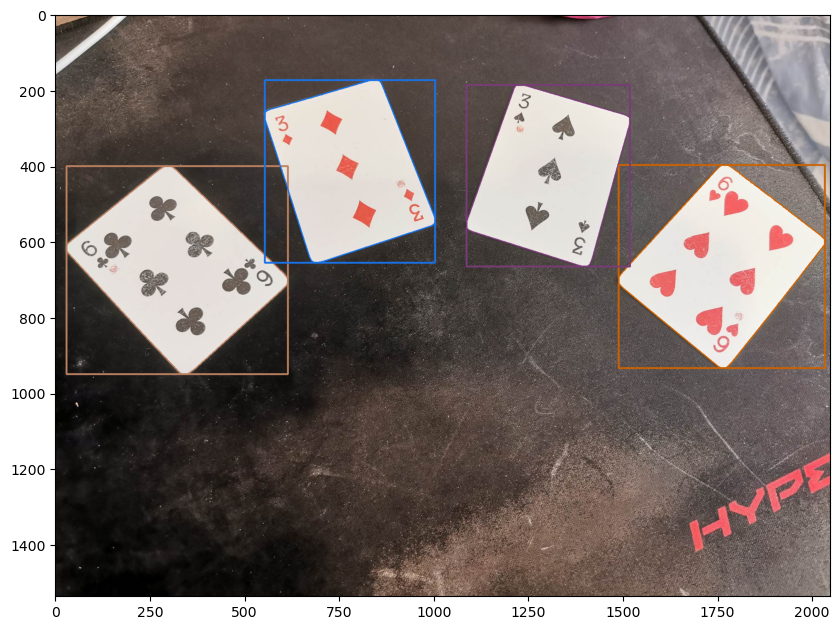

In [39]:
cardContours, _ = cv2.findContours(morphImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('contour points:', [len(c) for c in cardContours] )
print('contour area:  ', [cv2.contourArea(c) for c in cardContours] )

cardContours = [ contour for contour in cardContours if len(contour) > 200 and cv2.contourArea(contour) > 50000]
print('contour points:', [len(c) for c in cardContours] )
print('contour area:  ', [cv2.contourArea(c) for c in cardContours] )

cardContourImage = inputImage.copy()
for cardContourIdx in range(len(cardContours)):
    # if cardContourIdx != 5:
    #     continue
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    
    x, y, w, h = cv2.boundingRect(cardContours[cardContourIdx])
    cv2.drawContours(cardContourImage, cardContours, cardContourIdx, color, 2)
    cv2.rectangle(cardContourImage,(x,y),(x+w,y+h),color,3)
cardContourImage = cv2.cvtColor(cardContourImage, cv2.COLOR_BGR2RGB)

print('Total Card:', len(cardContours))
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cardContourImage, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
def euc(pt_1, pt_2):
    return np.sqrt( (pt_1[0] - pt_2[0])**2 + (pt_1[1] - pt_2[1])**2 )

In [35]:
def crop_cards(cardContours):
    result = []
    for contour in cardContours:
        convex = cv2.convexHull(contour) # should be card contour
        eps = 0.1*cv2.arcLength(convex, True)
        approximate_hull = cv2.approxPolyDP(convex, eps, True)
        approximate_hull = np.reshape(approximate_hull, (4,2))

        point_A = approximate_hull[0]
        point_B = approximate_hull[3]
        point_C = approximate_hull[2]
        point_D = approximate_hull[1]

        AD = euc(point_A, point_D)
        BC = euc(point_B, point_C)
        AB = euc(point_A, point_B)
        CD = euc(point_C, point_D)

        maxWidth = max(int(AD), int(BC))
        maxHeight = max(int(AB), int(CD))

        input_points = np.float32([point_A,point_B,point_C,point_D])
        output_points = np.float32([(0,0), (0, maxHeight-1), (maxWidth-1, maxHeight-1), (maxWidth-1, 0)])

        transform = cv2.getPerspectiveTransform(input_points, output_points)
        output = cv2.warpPerspective(inputImage.copy(), transform, (maxWidth, maxHeight), flags=cv2.INTER_LINEAR)

        # rotate card
        if output.shape[0] < output.shape[1]:
            output = cv2.rotate(output, cv2.ROTATE_90_CLOCKWISE)
        result.append(output)

    return result

In [36]:
res = crop_cards(cardContours)

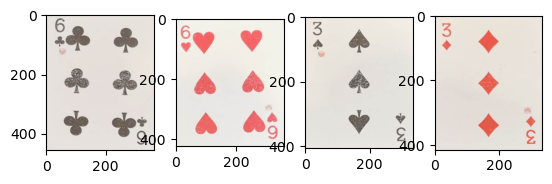

In [38]:
for i in range(len(res)):
    plt.subplot(1, len(res), i+1)
    plt.imshow(res[i])

In [3]:
# inputImage = get_sample_card()
# inputImage = cv2.cvtColor(cv2.imread('kaggle_dataset/Images/Images/JD34.jpg'), cv2.COLOR_BGR2RGB)
# inputImage = cv2.cvtColor(cv2.imread('kaggle_dataset/Images/Images/5S39.jpg'), cv2.COLOR_BGR2RGB) #ภาพติดมุม
# inputImage = cv2.cvtColor(cv2.imread('kaggle_dataset/Images/Images/2S31.jpg'), cv2.COLOR_BGR2RGB) #ภาพติดมุม
inputImage = cv2.cvtColor(cv2.imread('kaggle_dataset/Images/Images/7S49.jpg'), cv2.COLOR_BGR2RGB) #ได้ลายแทนทั้งการ์ด

inputImage = cv2.resize(inputImage, None, fx=0.3, fy=0.3)
inputImageGray = cv2.cvtColor(inputImage,cv2.COLOR_BGR2GRAY)
def cv2Canny(threshold1, threshold2):
    cannyImage = cv2.Canny(inputImage,threshold1,threshold2)
    plt.figure(figsize=(7,7))
    plt.imshow(cannyImage, cmap='gray')
    plt.show()
interact(cv2Canny, 
         threshold1=widgets.IntSlider(min=1,max=1000,step=2,value=100), 
         threshold2=widgets.IntSlider(min=1,max=1200,step=2,value=200));

interactive(children=(IntSlider(value=100, description='threshold1', max=1000, min=1, step=2), IntSlider(value…

In [18]:
# inputImage = get_sample_card()
# inputImage = cv2.cvtColor(cv2.imread('kaggle_dataset/Images/Images/AC37.jpg'), cv2.COLOR_BGR2RGB)

def cardDetection():
    # inputImage = get_sample_card()
    inputImage = cv2.cvtColor(cv2.imread("tmp.jpg"), cv2.COLOR_BGR2RGB)
    inputImage = cv2.resize(inputImage, None, fx=0.3, fy=0.3)
    inputImageGray = cv2.cvtColor(inputImage,cv2.COLOR_BGR2GRAY)
    output = cv2.Canny(inputImageGray, threshold1=100, threshold2=200)
    output = cv2.dilate(output, np.ones((3,3)), iterations=1)
    cardContours, _ = cv2.findContours(output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cardContours = sorted(cardContours, key=lambda x: cv2.contourArea(x), reverse=True)
    print(f'Find {len(cardContours)} contours')

    convex = cv2.convexHull(cardContours[0]) # should be card contour
    cardContourImage = inputImage.copy()
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv2.drawContours(cardContourImage, [convex], 0, color, 8)
    plt.figure(figsize=(15,10))
    plt.subplot(131)
    plt.imshow(cardContourImage, cmap='gray')
    # plt.show()

    eps = 0.1*cv2.arcLength(convex, True)
    approximate_hull = cv2.approxPolyDP(convex, eps, True)
    approximate_hull = np.reshape(approximate_hull, (4,2))

    cardContourImage_Approx = cardContourImage.copy()
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv2.drawContours(cardContourImage_Approx, [approximate_hull], -1, color, 3)
    plt.subplot(132)
    plt.imshow(cardContourImage_Approx,cmap='gray')
    # plt.show()

    point_A = approximate_hull[3]
    point_B = approximate_hull[2]
    point_C = approximate_hull[1]
    point_D = approximate_hull[0]

    def euc(pt_1, pt_2):
        return np.sqrt( (pt_1[0] - pt_2[0])**2 + (pt_1[1] - pt_2[1])**2 )

    AD = euc(point_A, point_D)
    BC = euc(point_B, point_C)
    AB = euc(point_A, point_B)
    CD = euc(point_C, point_D)

    maxWidth = max(int(AD), int(BC))
    maxHeight = max(int(AB), int(CD))

    input_points = np.float32([point_A,point_B,point_C,point_D])
    output_points = np.float32([(0,0), (0, maxHeight-1), (maxWidth-1, maxHeight-1), (maxWidth-1, 0)])

    transform = cv2.getPerspectiveTransform(input_points, output_points)
    output = cv2.warpPerspective(inputImage.copy(), transform, (maxWidth, maxHeight), flags=cv2.INTER_LINEAR)

    # # Resize to Mask size
    # output_5 = cv2.resize(output_5, (maskImage.shape[1], maskImage.shape[0]), interpolation = cv2.INTER_AREA)

    # Debug output
    print("output")
    plt.subplot(133)
    plt.imshow(output,cmap='gray')
    plt.show()


Find 3 contours
output


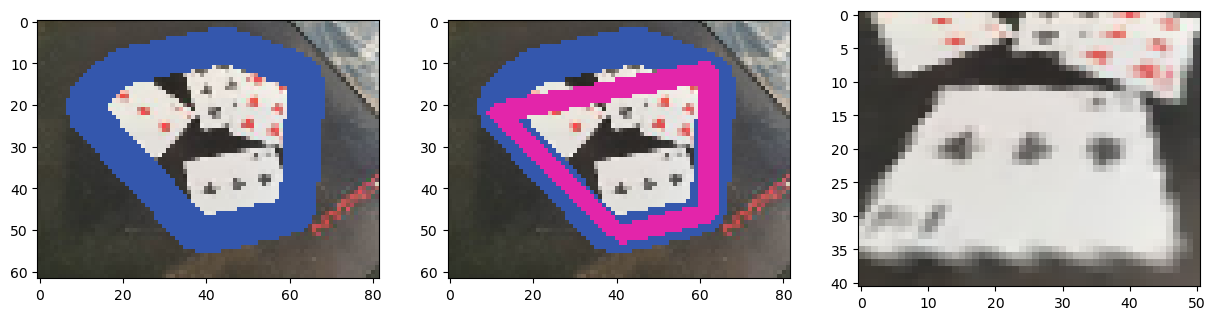

In [19]:
cardDetection()